<a href="https://colab.research.google.com/github/Nandakishor999/FMML_MODULE/blob/main/FMML_2024_Module_5_Lab_1_NL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

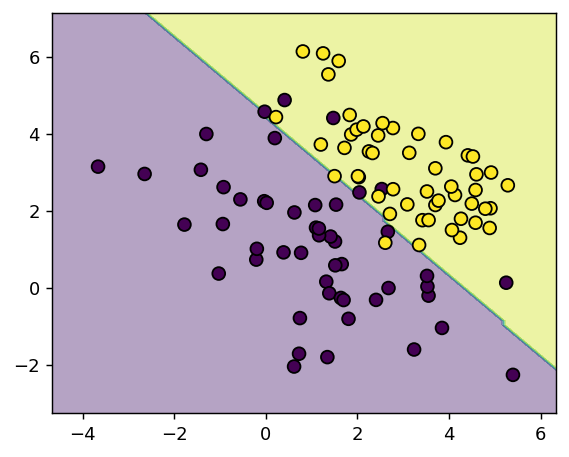

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


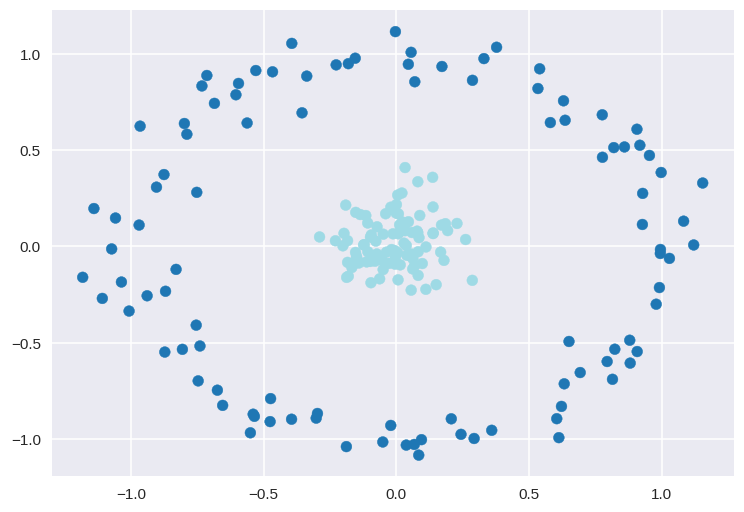

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

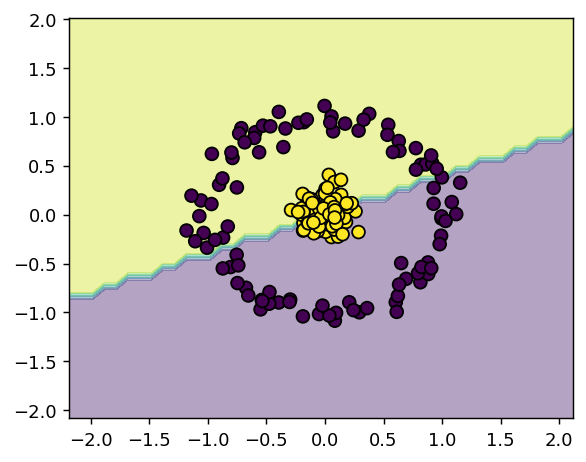

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [8]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])
X = np.array([[1, 2], [3, 4], [5, 6]])
Z = np.array([[5], [25], [61]])

In [9]:
X_new = np.hstack((X, Z))

In [12]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=[1, 2, 3, 4], y=[10, 15, 13, 17], mode='lines', name='Line Plot'))

# Customize layout
fig.update_layout(title="Simple Line Plot", xaxis_title="X-axis", yaxis_title="Y-axis")

# Show the figure
fig.show()

In [13]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

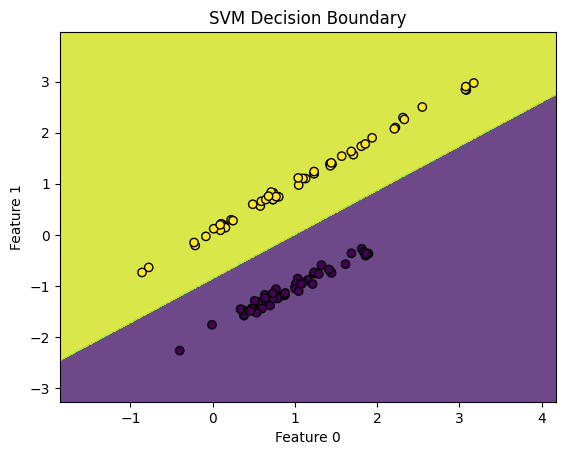

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate synthetic dataset for demonstration
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42
)

# Apply default Matplotlib style
plt.style.use("default")

# Initialize SVM classifier
clf = svm.SVC(kernel="linear", C=1.0)

# Train SVM on selected feature pair
pair = [0, 1]
clf.fit(X[:, pair], y)

# Function to plot decision boundary
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel(f"Feature {pair[0]}")
    plt.ylabel(f"Feature {pair[1]}")
    plt.title("SVM Decision Boundary")
    plt.show()

# Plot the decision boundary
plotDecisionBoundary(X, y, pair, clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [16]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

Learning Tasks:
Learn about SVM types, support vectors and hyperplanes.

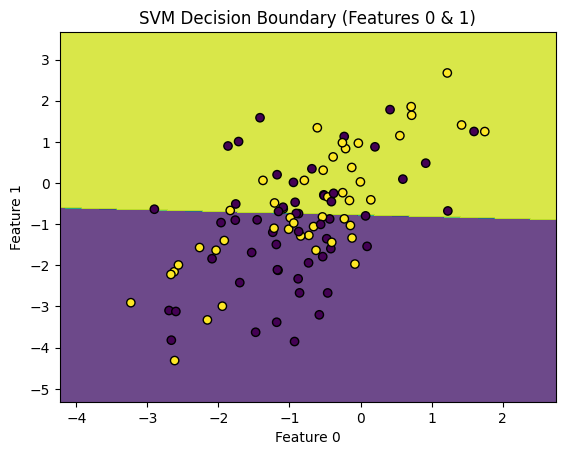

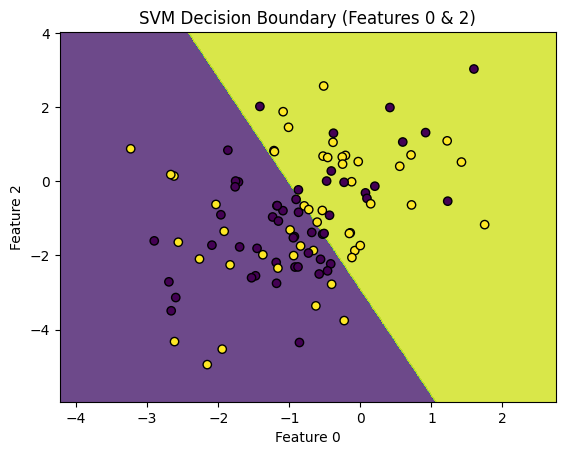

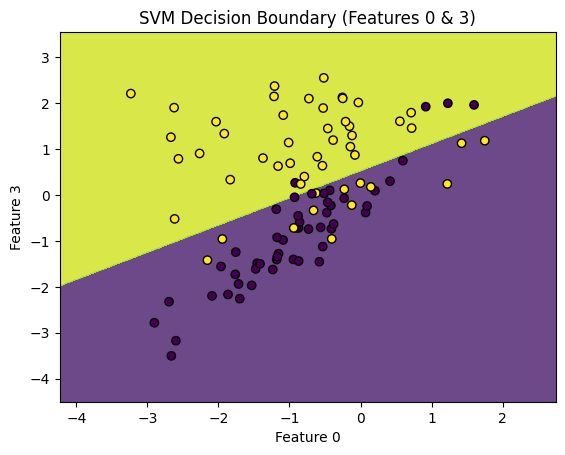

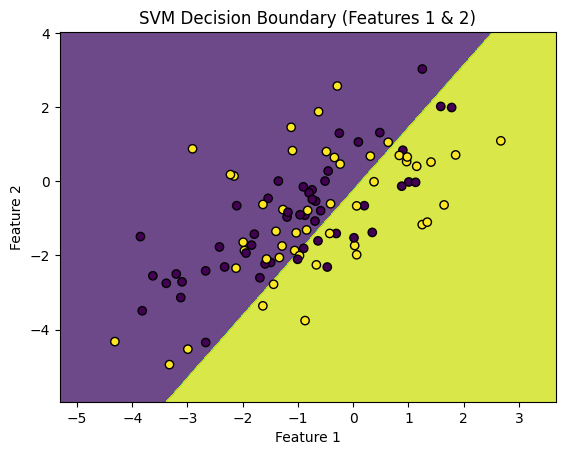

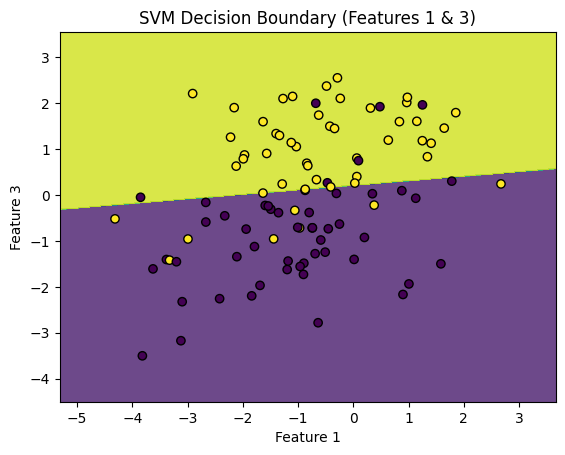

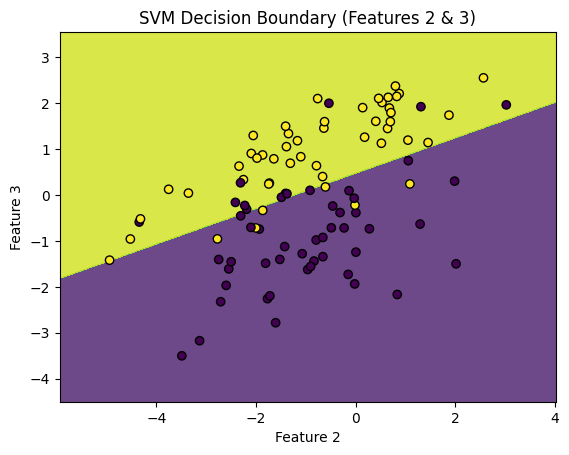

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from itertools import combinations

# Generate synthetic dataset with multiple features
X, y = make_classification(
    n_features=4,  # Number of features
    n_redundant=0,
    n_informative=4,
    n_clusters_per_class=1,
    random_state=42
)

# Apply default Matplotlib style
plt.style.use("default")

# Function to plot decision boundary for 2 features
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel(f"Feature {pair[0]}")
    plt.ylabel(f"Feature {pair[1]}")
    plt.title(f"SVM Decision Boundary (Features {pair[0]} & {pair[1]})")
    plt.show()

# Iterate through all combinations of 2 features
feature_combinations = list(combinations(range(X.shape[1]), 2))
for pair in feature_combinations:
    # Train SVM on the current feature pair
    clf = svm.SVC(kernel="linear", C=1.0)
    clf.fit(X[:, pair], y)

    # Plot decision boundary for the current pair
    plotDecisionBoundary(X[:, pair], y, pair, clf)

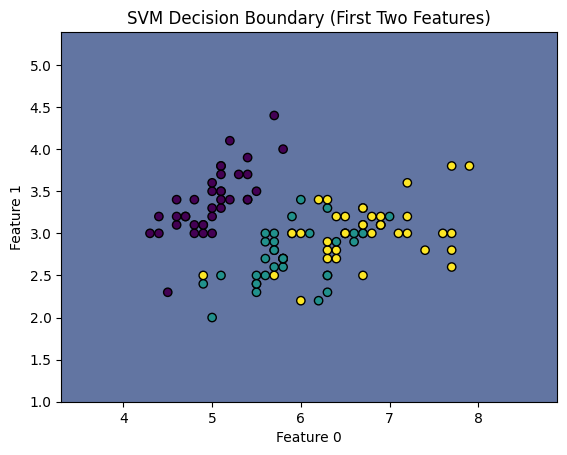

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize and train the SVM classifier
clf = svm.SVC(kernel="linear")  # Using a linear kernel for demonstration
clf.fit(X_train, y_train)


def plotDecisionBoundary(X, y, clf):
    """
    Plots the decision boundary of the SVM classifier.

    This function has been modified to consider two features
    for plotting but will use all training features for prediction.

    Args:
        X: The training data.
        y: The target labels.
        clf: The trained SVM classifier.
    """
    # Select the first two features for plotting
    pair = [0, 1]
    X = X[:, pair]

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Create a dataset for prediction using all original features
    # and the selected two features for plotting.
    prediction_data = np.zeros((xx.ravel().shape[0], X_train.shape[1]))
    prediction_data[:, pair[0]] = xx.ravel()
    prediction_data[:, pair[1]] = yy.ravel()

    # Predict using the classifier
    Z = clf.predict(prediction_data)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.title("SVM Decision Boundary (First Two Features)")
    plt.show()

# Plot the decision boundary
plotDecisionBoundary(X_train, y_train, clf)